# Exersise 1: Transformation
prob1)  
Rotation, translation and skew are useful operations for matching and tracking.  
Write a function that takes as input an image $I$, rotates it with an angle $θ_1$ and horizontally skews it with a second angle, $θ_2$.  
Write the matrix formulation for image rotation and skewing (define all the variables). 


prob2)   
• Create an image containing your name written in Arial, point 72, capital letters.   
Rotate the image you created by $θ$ = 30, $θ$ = 60, $θ$ = 120 and $θ$ = -50 degrees clockwise.   
Skew the same image by $θ$ = 10, $θ$ = 40 and $θ$ = 60 degrees.   
Comment the results.  

• Analyse the results when you change the order of the two operators i.e. R(S(I)) and S(R(I)), where R is the rotation and S is the skew.   
Are the results of (i) and (ii) the same? Why?   
• Rotate the image by $θ_1 = 20$ clockwise and then skew the result of $θ_2 = 50$.   
• Skew the image of $θ_2 = 50$ and then rotate the result by $θ_1 = 20$ clockwise.  


# Problem 1.
Rotation, translation and skew are useful operations for matching and tracking.  
Write a function that takes as input an image $I$, rotates it with an angle $θ_1$ and horizontally skews it with a second angle, $θ_2$.  
Write the matrix formulation for image rotation and skewing (define all the variables).  

## Answer )
$$
\begin{bmatrix}x'\\y'\\1\end{bmatrix}=
\underbrace{\begin{bmatrix}1 & {tan\theta_2}  & 0 \\ 0 & 1 & 0\\ 0 & 0 & 1\end{bmatrix}}_\text{skew}
\underbrace{\begin{bmatrix} cos\theta_1 & -sin\theta_1  & 0 \\ sin\theta_1 & cos\theta_1 & 0\\ 0 & 0 & 1\end{bmatrix}}_\text{rotation}
\begin{bmatrix}x\\y\\1\end{bmatrix}
$$
where $x',y'$ = output pixel position, $x,y$ = input pixel position, $θ_2$ = horizontal skew angle from y axis.

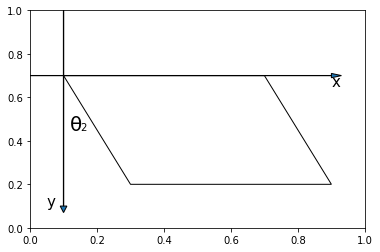

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax = fig.add_subplot(111)
    
# Parallelogram
x,y = [0.1,0.7,.9,.3],[0.7,0.7,.2,.2]
plt.arrow(x=0.1,y=1,dx=0,dy=-.9,head_width=.02)
plt.arrow(x=0,y=0.7,dx=.9,dy=0,head_width=.02)

ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False))

plt.text(0.12,.45,'θ',transform=ax.transAxes, fontsize=20)
plt.text(0.15,.45,'2',transform=ax.transAxes, fontsize=10)
plt.text(.9,.65,'x',transform=ax.transAxes, fontsize=15)
plt.text(.05,.1,'y',transform=ax.transAxes, fontsize=15)

plt.show()  

In [15]:
# plot function
def plot(imgs):
    fig, axs = plt.subplots(1, len(imgs), figsize=(10, 10))
    for ax, theta in zip(axs, imgs):
        ax.imshow(theta)
    plt.show()

# Problem 2.
>• Create an image containing your name written in Arial, point 72, capital letters.

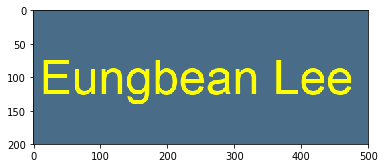

In [16]:
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

img = Image.new('RGB', (500, 200), color = (73, 109, 137))
fnt = ImageFont.truetype('assets/Arial.ttf',72)
d = ImageDraw.Draw(img)
d.text((10,60), "Eungbean Lee", font=fnt, fill=(255,255,0))
img=np.asarray(img)

plt.imshow(img)

## Define transformation function

### Inverse Mapping
<img src="assets/prob1-inversemapping.png" width="400">

Inverse mapping is used in most of the practical implemeantation.  
1. locate the output image pixel grid in output space.  
2. for each output pixel on the grid:  
    1) apply the inverse spatial transformation to determine the corresponding location in input space: $(u_k, v_k) = T^{-1}{(x_k, y_k)}$  
    2) Using the input image pixels nearest to $(u_k, v_k)$ interpolate to get an approximate value for the input image at $(u_k, v_k)$.  
    3) Use that value for the k-th output pixel.  

### Define bilinear interpolation function

![interpolation](https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Comparison_of_1D_and_2D_interpolation.svg/500px-Comparison_of_1D_and_2D_interpolation.svg.png)  
credit: https://rosettacode.org/wiki/Bilinear_interpolation#Python

In [17]:
def Bilinear(imArr, posX, posY):
    out = []

    #Get integer and fractional parts of numbers
    modXi = int(posX)
    modYi = int(posY)
    modXf = posX - modXi
    modYf = posY - modYi
    modXiPlusOneLim = min(modXi+1,imArr.shape[1]-1)
    modYiPlusOneLim = min(modYi+1,imArr.shape[0]-1)

    #Get pixels in four corners
    for chan in range(imArr.shape[2]):
        bl = imArr[modYi, modXi, chan]
        br = imArr[modYi, modXiPlusOneLim, chan]
        tl = imArr[modYiPlusOneLim, modXi, chan]
        tr = imArr[modYiPlusOneLim, modXiPlusOneLim, chan]

        #Calculate interpolation
        b = modXf * br + (1. - modXf) * bl
        t = modXf * tr + (1. - modXf) * tl
        pxf = modYf * t + (1. - modYf) * b
        out.append(int(pxf+0.5))

    return out

### Rotation
>Problem: Rotate the image you created by $θ$ = 30, $θ$ = 60, $θ$ = 120 and $θ$ = -50 degrees clockwise.   
Comment the results.  


We're going to define rotation function according to the matrix that we derive in problem 1.
$$
\begin{bmatrix}x'\\y'\\1\end{bmatrix}=
\underbrace{\begin{bmatrix} cos\theta_1 & sin\theta_1  & 0 \\ -sin\theta_1 & cos\theta_1 & 0\\ 0 & 0 & 1\end{bmatrix}}_\text{rotation}
\begin{bmatrix}x\\y\\1\end{bmatrix}
$$

In [18]:
 def rot_pt(pos, T):
    before = np.asarray([pos[0], pos[1], 1]).T
    after = np.matmul(T, before)
    return after[0:2]

In [19]:
def rotation(img, theta):
    (h, w, c) = img.shape
    angle = np.radians(theta)
    cos, sin = np.cos(angle), np.sin(angle)

    T = np.array([[ cos,sin,0],
                   [-sin,cos,0],
                   [   0,  0,1]])
    
    #Get output img size
    extremes = np.vstack((rot_pt((0,0),T), rot_pt((w,0),T), rot_pt((0,h),T), rot_pt((w,h),T))).T
    minx, maxx, miny, maxy = np.min(extremes[0]), np.max(extremes[0]), np.min(extremes[1]),np.max(extremes[1])
    
    T = np.array([[ cos, sin, -minx],
                  [-sin, cos, -miny],
                  [   0,   0,    1]], np.float64)

    Tinv = np.linalg.inv(T)

    #Define output image
    img_rot = np.zeros((np.int(maxy-miny),np.int(maxx-minx),3), dtype=np.uint8)

    for x in range(0, img_rot.shape[1]):
        for y in range(0, img_rot.shape[0]):
            (x_inv, y_inv) = rot_pt((x,y),Tinv)
            if x_inv < 0 or y_inv < 0 or x_inv>w or y_inv>h: pass
            else:
                img_rot[y,x] = Bilinear(img, x_inv,y_inv)

    return img_rot

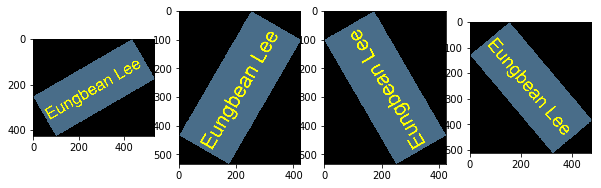

In [20]:
plot([rotation(img, 30), rotation(img, 60), rotation(img, 120),rotation(img, -50)])

### Skew matrix

>Problem: Skew the same image by $θ$ = 10, $θ$ = 40 and $θ$ = 60 degrees.   
>Comment the results.  

We're going to define horizontal skew function according to the matrix that we derive in problem 1.
$$
\begin{bmatrix}x'\\y'\\1\end{bmatrix}=
\underbrace{\begin{bmatrix}1 & {tan\theta_2}  & 0 \\ 0 & 1 & 0\\ 0 & 0 & 1\end{bmatrix}}_\text{skew}
\begin{bmatrix}x\\y\\1\end{bmatrix}
$$

In [25]:
def skew(img, theta):
    (h, w, c) = img.shape
    angle = np.radians(theta)
    tan = np.tan(angle)

    T = np.array([[ 1, tan, 0],
                   [ 0,   1, 0],
                   [ 0,   0, 1]])

    #Get output img size
    extremes = np.vstack((rot_pt((0,0),T), rot_pt((w,0),T), rot_pt((0,h),T), rot_pt((w,h),T))).T
    minx, maxx, miny, maxy = np.min(extremes[0]), np.max(extremes[0]), np.min(extremes[1]),np.max(extremes[1])

    Tinv = np.linalg.inv(T)

    #Define output image
    img_skew = np.zeros((np.int(maxy-miny),np.int(maxx-minx),3), dtype=np.uint8)

    for x in range(0, img_skew.shape[1]):
        for y in range(0, img_skew.shape[0]):
            (x_inv, y_inv) = rot_pt((x,y),Tinv)
            if x_inv < 0 or y_inv < 0 or x_inv>w-1 or y_inv>h-1: pass
            else:
                img_skew[y,x] = Bilinear(img,x_inv,y_inv)

    return img_skew         

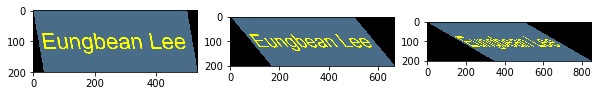

In [26]:
plot([skew(img, 10), skew(img, 40), skew(img, 60)])

>• Analyse the results when you change the order of the two operators   
i.e. R(S(I)) and S(R(I)), where R is the rotation and S is the skew.   
>Are the results of (i) and (ii) the same? Why?   

>• Rotate the image by $θ_1 = 20$ clockwise and then skew the result of $θ_2 = 50$.   

In [10]:
img_R = rotation(img,20)
img_RS = skew(img_R,50)

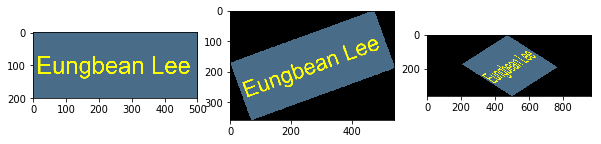

In [11]:
plot([img,img_R,img_RS])

>• Skew the image of $θ_2 = 50$ and then rotate the result by $θ_1 = 20$ clockwise.  

In [12]:
img_S = skew(img,50)
img_SR = rotation(img_S,20)

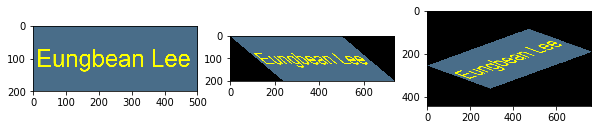

In [13]:
plot([img,img_S,img_SR])